In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

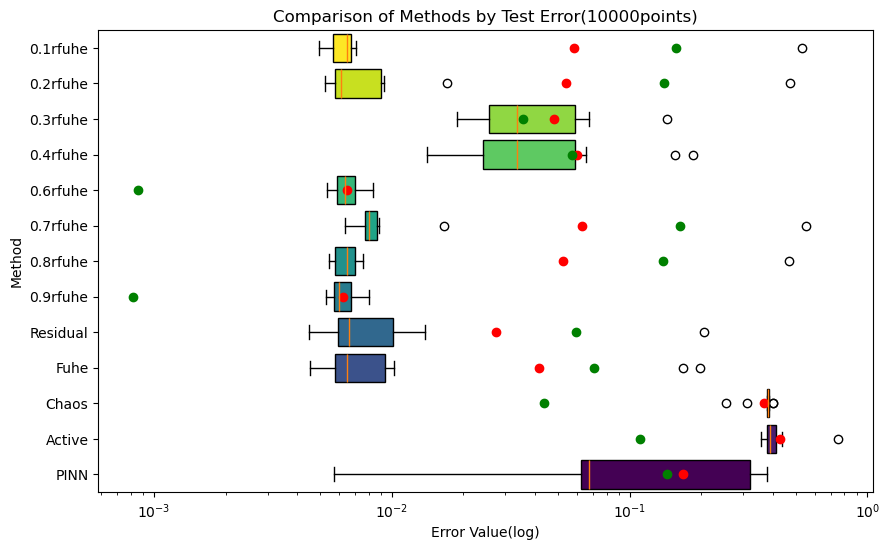

In [2]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.3483230307133258, 0.06655278697089981, 0.06823545906767987, 0.06370955409864532, 0.062005208792711014, 0.3229283988187904, 0.37678176609367614, 0.04274695510932498, 0.005700814827643679, 0.3141703466091914],
    'Active': [0.4072500508764285, 0.4369916178472029, 0.4134901301061168, 0.3702678872891184, 0.3915491848736719, 0.38915176907921883, 0.3576345865449998, 0.3757274419646285, 0.7514636257883783, 0.38279348872132096],
    'Chaos': [0.40203148535084804, 0.3843817460390534, 0.38419919281504933, 0.38091952922300404, 0.2554496497776422, 0.380257843318107, 0.37814049836232505, 0.4002912032781455, 0.38122662160071075, 0.3120487197525356],
    'Fuhe': [0.006523077410012704, 0.005155940588906752, 0.0045180565796615665, 0.005595410590543004, 0.006703539123728734, 0.006185959238724754, 0.16704741335893145, 0.010199281170488916, 0.19727914582471862, 0.006408592044770679],
    'Residual': [0.005936840361050542, 0.01009709853357338, 0.005594410468342117, 0.006054801154312517, 0.004473344373854045, 0.007172801362990527, 0.006020731984708229, 0.013771429930184854, 0.20595280704632135, 0.010057650596536061],
    '0.9rfuhe': [0.006004593704111322, 0.005800480557491781, 0.008020217862824466, 0.0068130584273124436, 0.005688494789869912, 0.006032851402302484, 0.005392965083302217, 0.006382469649269528, 0.00719822052495676, 0.005264576544603394],
    '0.8rfuhe': [0.005433056867945988, 0.005783493591375159, 0.00574663623874847, 0.0075701478458309315, 0.006397484841541326, 0.0055586802536032424, 0.006707879281156755, 0.007105960042311779, 0.4682385878690329, 0.006526366626681166],
    '0.7rfuhe': [0.00783923057833288, 0.00635583756402561, 0.008822463333472363, 0.008027609833574909, 0.007383510889942593, 0.007938221877193574, 0.00821593942977445, 0.016572541506465456, 0.5534289853904958, 0.007709391934992798],
    '0.6rfuhe': [0.006436023886097595, 0.005798321383451822, 0.0055770145038127016, 0.006310413966055017, 0.007314982233189383, 0.005358156500519818, 0.006105292502433805, 0.006474646112034115, 0.008336536806698158, 0.00721378041216497],
    '0.4rfuhe': [0.03544554033195183, 0.022039489619260423, 0.014106398819122472, 0.018449393968980383, 0.03943527419627716, 0.0316890750710958, 0.06555348715412573, 0.1855047560764724, 0.15466021729780788, 0.031004649307080422],
    '0.3rfuhe': [0.036103719647937474, 0.04485722190309874, 0.023757248328115158, 0.018713366487043963, 0.02740116134478332, 0.0672537174143648, 0.03107066073080683, 0.06385277062181488, 0.1441111323296726, 0.025099502667741358],
    '0.2rfuhe': [0.005524913971566541, 0.009235709399981955, 0.0063899719108389515, 0.005854605694462501, 0.0052496842635315726, 0.005747151350000867, 0.017048108577140765, 0.008313144031926144, 0.47134166559582574, 0.00582293595186423],
    '0.1rfuhe': [0.529515640004592, 0.007073838558088763, 0.006408098602657453, 0.006793964147202629, 0.006553316187139965, 0.006531507264318616, 0.005605430261042504, 0.005650662278455626, 0.005677087438146899, 0.004956331094401057]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(10000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

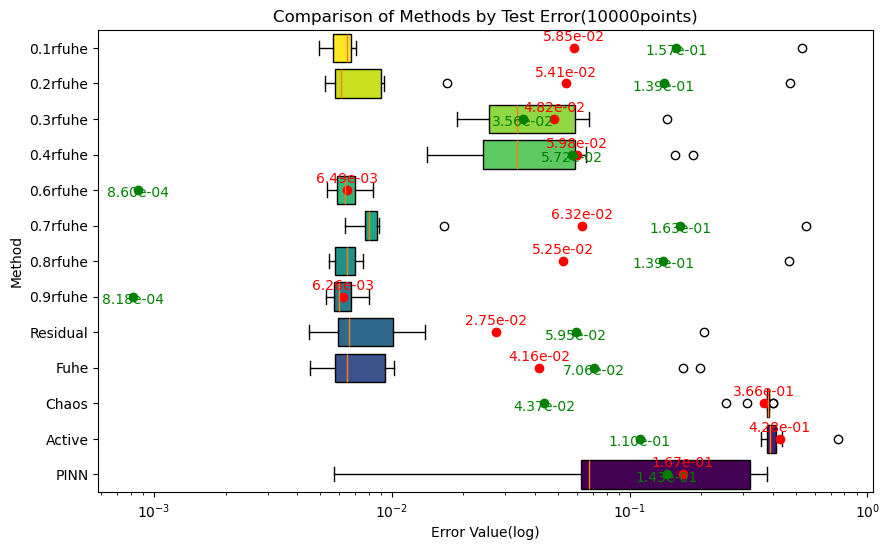

In [3]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.3483230307133258, 0.06655278697089981, 0.06823545906767987, 0.06370955409864532, 0.062005208792711014, 0.3229283988187904, 0.37678176609367614, 0.04274695510932498, 0.005700814827643679, 0.3141703466091914],
    'Active': [0.4072500508764285, 0.4369916178472029, 0.4134901301061168, 0.3702678872891184, 0.3915491848736719, 0.38915176907921883, 0.3576345865449998, 0.3757274419646285, 0.7514636257883783, 0.38279348872132096],
    'Chaos': [0.40203148535084804, 0.3843817460390534, 0.38419919281504933, 0.38091952922300404, 0.2554496497776422, 0.380257843318107, 0.37814049836232505, 0.4002912032781455, 0.38122662160071075, 0.3120487197525356],
    'Fuhe': [0.006523077410012704, 0.005155940588906752, 0.0045180565796615665, 0.005595410590543004, 0.006703539123728734, 0.006185959238724754, 0.16704741335893145, 0.010199281170488916, 0.19727914582471862, 0.006408592044770679],
    'Residual': [0.005936840361050542, 0.01009709853357338, 0.005594410468342117, 0.006054801154312517, 0.004473344373854045, 0.007172801362990527, 0.006020731984708229, 0.013771429930184854, 0.20595280704632135, 0.010057650596536061],
    '0.9rfuhe': [0.006004593704111322, 0.005800480557491781, 0.008020217862824466, 0.0068130584273124436, 0.005688494789869912, 0.006032851402302484, 0.005392965083302217, 0.006382469649269528, 0.00719822052495676, 0.005264576544603394],
    '0.8rfuhe': [0.005433056867945988, 0.005783493591375159, 0.00574663623874847, 0.0075701478458309315, 0.006397484841541326, 0.0055586802536032424, 0.006707879281156755, 0.007105960042311779, 0.4682385878690329, 0.006526366626681166],
    '0.7rfuhe': [0.00783923057833288, 0.00635583756402561, 0.008822463333472363, 0.008027609833574909, 0.007383510889942593, 0.007938221877193574, 0.00821593942977445, 0.016572541506465456, 0.5534289853904958, 0.007709391934992798],
    '0.6rfuhe': [0.006436023886097595, 0.005798321383451822, 0.0055770145038127016, 0.006310413966055017, 0.007314982233189383, 0.005358156500519818, 0.006105292502433805, 0.006474646112034115, 0.008336536806698158, 0.00721378041216497],
    '0.4rfuhe': [0.03544554033195183, 0.022039489619260423, 0.014106398819122472, 0.018449393968980383, 0.03943527419627716, 0.0316890750710958, 0.06555348715412573, 0.1855047560764724, 0.15466021729780788, 0.031004649307080422],
    '0.3rfuhe': [0.036103719647937474, 0.04485722190309874, 0.023757248328115158, 0.018713366487043963, 0.02740116134478332, 0.0672537174143648, 0.03107066073080683, 0.06385277062181488, 0.1441111323296726, 0.025099502667741358],
    '0.2rfuhe': [0.005524913971566541, 0.009235709399981955, 0.0063899719108389515, 0.005854605694462501, 0.0052496842635315726, 0.005747151350000867, 0.017048108577140765, 0.008313144031926144, 0.47134166559582574, 0.00582293595186423],
    '0.1rfuhe': [0.529515640004592, 0.007073838558088763, 0.006408098602657453, 0.006793964147202629, 0.006553316187139965, 0.006531507264318616, 0.005605430261042504, 0.005650662278455626, 0.005677087438146899, 0.004956331094401057]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(10000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

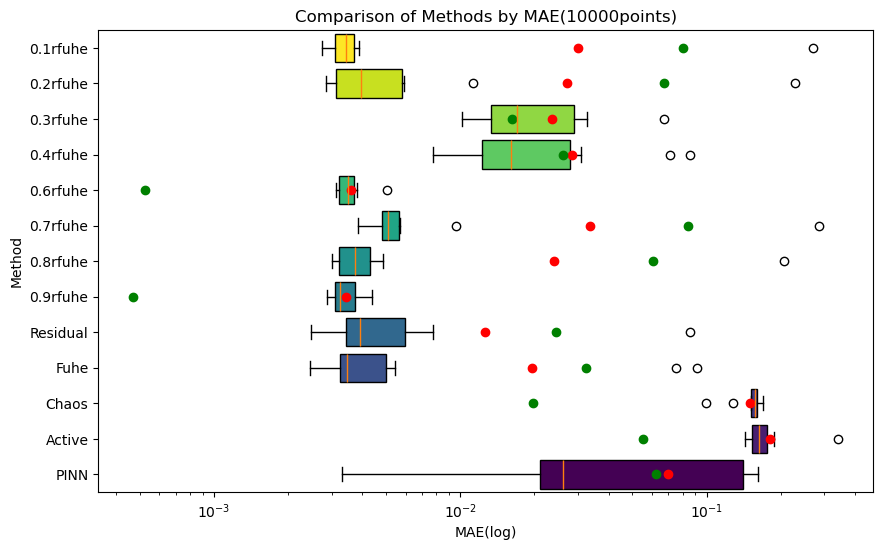

In [4]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.14482204584243175, 0.025236943440228064, 0.023875915881075224, 0.02693932320995252, 0.020194138705335037, 0.1444462413262765, 0.1618543355846889, 0.01562858658216366, 0.0033156893519249954, 0.12738558184130988],
    'Active': [0.1644818051157677, 0.18847612658691734, 0.17780203801878908, 0.1433848759551153, 0.1450755308248206, 0.1726662824823063, 0.1576743509846429, 0.1608696793297323, 0.34124933217057285, 0.1511806195198226],
    'Chaos': [0.1627791896250261, 0.15240656264295602, 0.16032015161520857, 0.15939747728013964, 0.09925502365495331, 0.15814327703551484, 0.1516174505871757, 0.16898100326192855, 0.156724307302528, 0.12817053899068961],
    'Fuhe': [0.0036005982662033736, 0.0028320611881322037, 0.002451429677702944, 0.0031691781792181715, 0.0034224535228337336, 0.0034609081302588406, 0.07518639861148853, 0.00545308346374413, 0.09179739797379864, 0.0034851336189780915],
    'Residual': [0.00343730163922669, 0.006153658113992598, 0.003410802013045048, 0.0034823890766193777, 0.0024858377197863844, 0.004341827339575102, 0.003452396635448465, 0.007781103740775292, 0.08548265673067312, 0.005485981252256544],
    '0.9rfuhe': [0.0033400729531132705, 0.0031568324515108656, 0.004362022975063639, 0.0038342780829583446, 0.0030616951768121046, 0.003069961523385648, 0.003130210463732452, 0.0034369458230953656, 0.004079427513160901, 0.002862907169248275],
    '0.8rfuhe': [0.0030171240530601604, 0.0032818993635692164, 0.0030475255663584703, 0.004833290263737173, 0.003743524138571336, 0.0032002527989908975, 0.004009765532214866, 0.004369365569928103, 0.20573941962664757, 0.00371014919123279],
    '0.7rfuhe': [0.004966822121570466, 0.003854035522337869, 0.005694248591426331, 0.005156505155031804, 0.004728057070100089, 0.004782698186754299, 0.005407590767688676, 0.009589514797755903, 0.28588657510825044, 0.005032694346791198],
    '0.6rfuhe': [0.0034420936350139084, 0.003185621533798595, 0.0031846112810437754, 0.003331467202000288, 0.0037458169981414756, 0.0031245456950890166, 0.003611788642594076, 0.003560692426049923, 0.00502097202829107, 0.0038196814712493413],
    '0.4rfuhe': [0.016963331902275832, 0.011391873276889355, 0.007740022299276413, 0.009963667375402215, 0.018810745928303837, 0.015200175408515202, 0.030829490793508312, 0.08597334241907241, 0.07115352392625987, 0.014984847955479963],
    '0.3rfuhe': [0.018185654276192047, 0.02192071348416464, 0.012680969747967057, 0.010179710927717637, 0.013694474326699178, 0.032685698946577815, 0.015668551107489954, 0.0311126125436352, 0.06726809516946482, 0.013119783718780918],
    '0.2rfuhe': [0.0030337799045308156, 0.005914552357446299, 0.004266750042511171, 0.0031218893601268325, 0.0028436016359257316, 0.003625599892441109, 0.011205441458414664, 0.00554356255091398, 0.22805090730394595, 0.003157378800310925],
    '0.1rfuhe': [0.26942015673296854, 0.003650813486426615, 0.003419938905356236, 0.0036964863500573188, 0.003431176054066669, 0.0038598409990358304, 0.00305436527477918, 0.0032554536624613325, 0.002989265003038127, 0.0027478938968035693]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(10000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

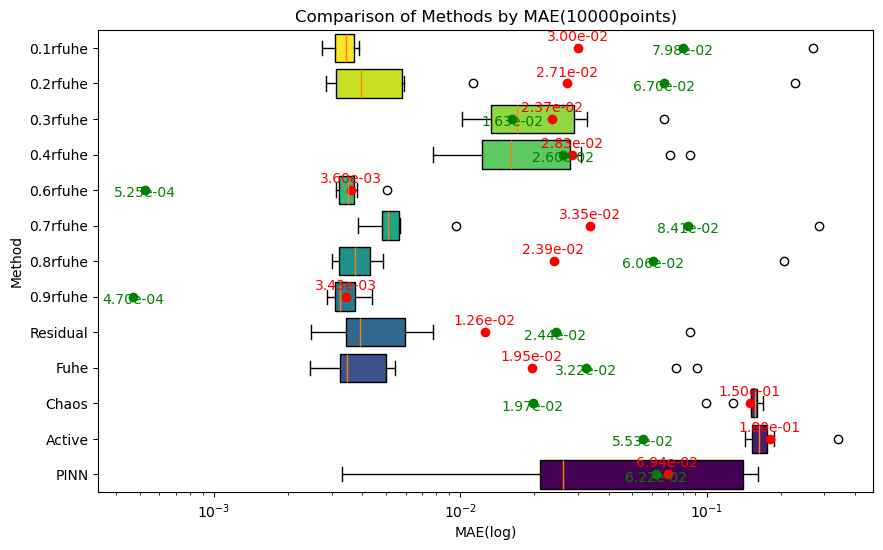

In [6]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.14482204584243175, 0.025236943440228064, 0.023875915881075224, 0.02693932320995252, 0.020194138705335037, 0.1444462413262765, 0.1618543355846889, 0.01562858658216366, 0.0033156893519249954, 0.12738558184130988],
    'Active': [0.1644818051157677, 0.18847612658691734, 0.17780203801878908, 0.1433848759551153, 0.1450755308248206, 0.1726662824823063, 0.1576743509846429, 0.1608696793297323, 0.34124933217057285, 0.1511806195198226],
    'Chaos': [0.1627791896250261, 0.15240656264295602, 0.16032015161520857, 0.15939747728013964, 0.09925502365495331, 0.15814327703551484, 0.1516174505871757, 0.16898100326192855, 0.156724307302528, 0.12817053899068961],
    'Fuhe': [0.0036005982662033736, 0.0028320611881322037, 0.002451429677702944, 0.0031691781792181715, 0.0034224535228337336, 0.0034609081302588406, 0.07518639861148853, 0.00545308346374413, 0.09179739797379864, 0.0034851336189780915],
    'Residual': [0.00343730163922669, 0.006153658113992598, 0.003410802013045048, 0.0034823890766193777, 0.0024858377197863844, 0.004341827339575102, 0.003452396635448465, 0.007781103740775292, 0.08548265673067312, 0.005485981252256544],
    '0.9rfuhe': [0.0033400729531132705, 0.0031568324515108656, 0.004362022975063639, 0.0038342780829583446, 0.0030616951768121046, 0.003069961523385648, 0.003130210463732452, 0.0034369458230953656, 0.004079427513160901, 0.002862907169248275],
    '0.8rfuhe': [0.0030171240530601604, 0.0032818993635692164, 0.0030475255663584703, 0.004833290263737173, 0.003743524138571336, 0.0032002527989908975, 0.004009765532214866, 0.004369365569928103, 0.20573941962664757, 0.00371014919123279],
    '0.7rfuhe': [0.004966822121570466, 0.003854035522337869, 0.005694248591426331, 0.005156505155031804, 0.004728057070100089, 0.004782698186754299, 0.005407590767688676, 0.009589514797755903, 0.28588657510825044, 0.005032694346791198],
    '0.6rfuhe': [0.0034420936350139084, 0.003185621533798595, 0.0031846112810437754, 0.003331467202000288, 0.0037458169981414756, 0.0031245456950890166, 0.003611788642594076, 0.003560692426049923, 0.00502097202829107, 0.0038196814712493413],
    '0.4rfuhe': [0.016963331902275832, 0.011391873276889355, 0.007740022299276413, 0.009963667375402215, 0.018810745928303837, 0.015200175408515202, 0.030829490793508312, 0.08597334241907241, 0.07115352392625987, 0.014984847955479963],
    '0.3rfuhe': [0.018185654276192047, 0.02192071348416464, 0.012680969747967057, 0.010179710927717637, 0.013694474326699178, 0.032685698946577815, 0.015668551107489954, 0.0311126125436352, 0.06726809516946482, 0.013119783718780918],
    '0.2rfuhe': [0.0030337799045308156, 0.005914552357446299, 0.004266750042511171, 0.0031218893601268325, 0.0028436016359257316, 0.003625599892441109, 0.011205441458414664, 0.00554356255091398, 0.22805090730394595, 0.003157378800310925],
    '0.1rfuhe': [0.26942015673296854, 0.003650813486426615, 0.003419938905356236, 0.0036964863500573188, 0.003431176054066669, 0.0038598409990358304, 0.00305436527477918, 0.0032554536624613325, 0.002989265003038127, 0.0027478938968035693]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(10000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

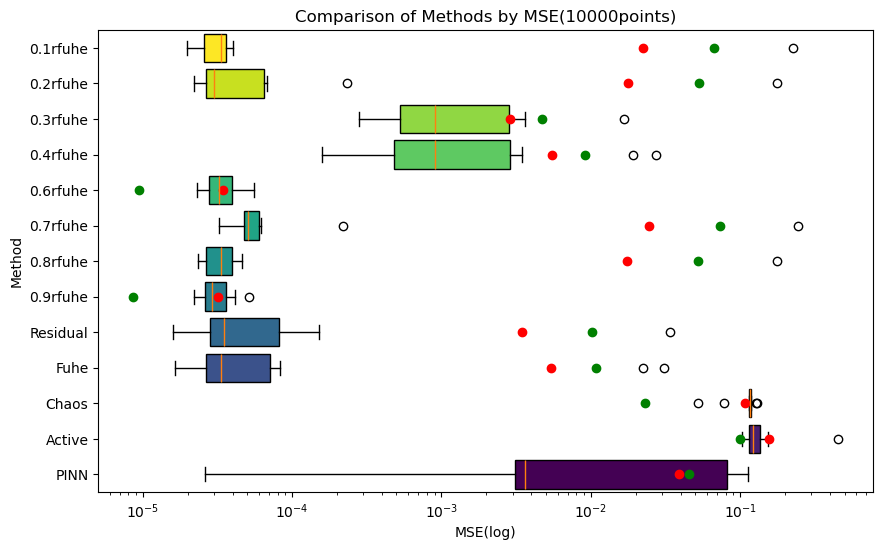

In [5]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.09705432957736754, 0.003543096871902167, 0.003724523925688905, 0.0032468308516055305, 0.0030754373299206527, 0.08341862201447513, 0.11356128234609232, 0.0014617089403809935, 2.599706992089799e-05, 0.07895523225411608],
    'Active': [0.13267003005555436, 0.15275546139447982, 0.13676684486426535, 0.10966868326690424, 0.12263746970453065, 0.12114027388683257, 0.10231270286754783, 0.11292662911214085, 0.451717026135263, 0.11721403509028032],
    'Chaos': [0.1292917059965328, 0.11818872388410524, 0.11807648853806946, 0.116069205287097, 0.052198876580112165, 0.11566631361904617, 0.11438179759496811, 0.12817479323501846, 0.11625642769680132, 0.07789244625693614],
    'Fuhe': [3.403733881940545e-05, 2.1265046751837143e-05, 1.6328784732658097e-05, 2.5044620433244222e-05, 3.5946683664165994e-05, 3.0610092430258624e-05, 0.022321842704598152, 8.321270922650568e-05, 0.031132420715975318, 3.285305689105058e-05],
    'Residual': [2.8194297321216202e-05, 8.155370986848867e-05, 2.503566829577554e-05, 2.9325829357864324e-05, 1.6007193653318896e-05, 4.11555245277044e-05, 2.8996736546743608e-05, 0.00015170804315523106, 0.033930164422811174, 8.091771702879989e-05],
    '0.9rfuhe': [2.8841496186169328e-05, 2.6914014615317996e-05, 5.145444100873342e-05, 3.713083876395627e-05, 2.5884826738446923e-05, 2.9113591858877457e-05, 2.3265144269331096e-05, 3.258577463572936e-05, 4.1447737446501425e-05, 2.2170598752400565e-05],
    '0.8rfuhe': [2.3612340358999916e-05, 2.6756607654677914e-05, 2.6416662489971514e-05, 4.5841546013685434e-05, 3.273927546927516e-05, 2.4716895395151732e-05, 3.599324556777711e-05, 4.0392064872158476e-05, 0.1753819666531998, 3.4071673659150943e-05],
    '0.7rfuhe': [4.9158362802322174e-05, 3.231440114320465e-05, 6.22630308090885e-05, 5.1549332446181604e-05, 4.36090245619811e-05, 5.040771370760136e-05, 5.399642298646746e-05, 0.00021969934586266358, 0.24500465478037112, 4.754345987418697e-05],
    '0.6rfuhe': [3.3134912457319505e-05, 2.6893981369705472e-05, 2.4880212248937795e-05, 3.18541655818488e-05, 4.280328337169012e-05, 2.2965786421520835e-05, 2.9816968355408335e-05, 3.3533787270400454e-05, 5.559322608919364e-05, 4.162712043674625e-05],
    '0.4rfuhe': [0.0010050177574994605, 0.00038855598176281347, 0.00015917792877252984, 0.000272279373629211, 0.001243999663160595, 0.0008032850045055132, 0.0034374954453880342, 0.027527110778744965, 0.0191340879164368, 0.000768960762703706],
    '0.3rfuhe': [0.0010426881295338198, 0.001609590053952014, 0.0004514844610564127, 0.0002801266186702373, 0.0006006043494236619, 0.003618121297885702, 0.0007722386085859198, 0.0032614447500374055, 0.016612905483691758, 0.0005039422440929921],
    '0.2rfuhe': [2.4417521178481936e-05, 6.823246356543492e-05, 3.2662425429962526e-05, 2.7418635282275855e-05, 2.2045345069945874e-05, 2.6421398523157783e-05, 0.00023248928315418283, 5.5281668607138514e-05, 0.17771422721256744, 2.7122802368252242e-05],
    '0.1rfuhe': [0.22428907370584478, 4.002771703160111e-05, 3.2847997914725374e-05, 3.6923004605327396e-05, 3.435364140455015e-05, 3.4125369419273034e-05, 2.5134395264905195e-05, 2.5541666883207397e-05, 2.5781115205448455e-05, 1.9650389092561583e-05]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(10000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

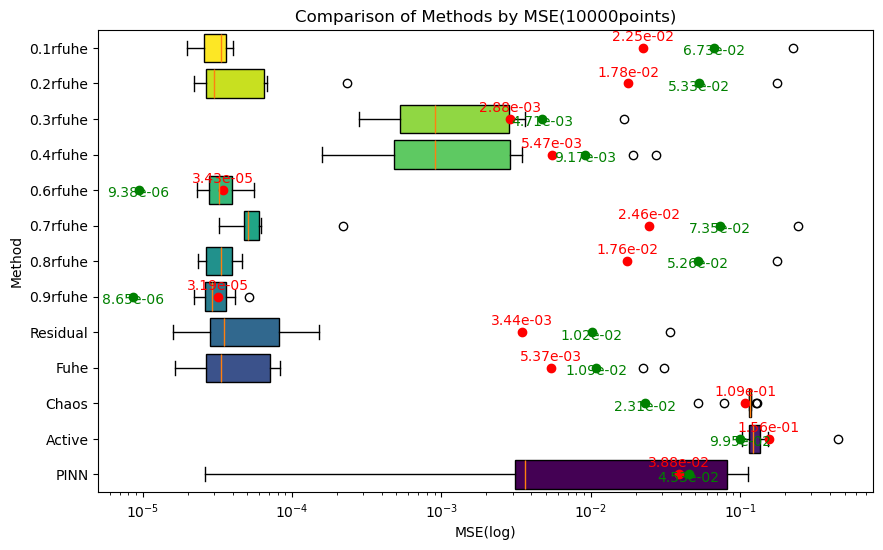

In [7]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.09705432957736754, 0.003543096871902167, 0.003724523925688905, 0.0032468308516055305, 0.0030754373299206527, 0.08341862201447513, 0.11356128234609232, 0.0014617089403809935, 2.599706992089799e-05, 0.07895523225411608],
    'Active': [0.13267003005555436, 0.15275546139447982, 0.13676684486426535, 0.10966868326690424, 0.12263746970453065, 0.12114027388683257, 0.10231270286754783, 0.11292662911214085, 0.451717026135263, 0.11721403509028032],
    'Chaos': [0.1292917059965328, 0.11818872388410524, 0.11807648853806946, 0.116069205287097, 0.052198876580112165, 0.11566631361904617, 0.11438179759496811, 0.12817479323501846, 0.11625642769680132, 0.07789244625693614],
    'Fuhe': [3.403733881940545e-05, 2.1265046751837143e-05, 1.6328784732658097e-05, 2.5044620433244222e-05, 3.5946683664165994e-05, 3.0610092430258624e-05, 0.022321842704598152, 8.321270922650568e-05, 0.031132420715975318, 3.285305689105058e-05],
    'Residual': [2.8194297321216202e-05, 8.155370986848867e-05, 2.503566829577554e-05, 2.9325829357864324e-05, 1.6007193653318896e-05, 4.11555245277044e-05, 2.8996736546743608e-05, 0.00015170804315523106, 0.033930164422811174, 8.091771702879989e-05],
    '0.9rfuhe': [2.8841496186169328e-05, 2.6914014615317996e-05, 5.145444100873342e-05, 3.713083876395627e-05, 2.5884826738446923e-05, 2.9113591858877457e-05, 2.3265144269331096e-05, 3.258577463572936e-05, 4.1447737446501425e-05, 2.2170598752400565e-05],
    '0.8rfuhe': [2.3612340358999916e-05, 2.6756607654677914e-05, 2.6416662489971514e-05, 4.5841546013685434e-05, 3.273927546927516e-05, 2.4716895395151732e-05, 3.599324556777711e-05, 4.0392064872158476e-05, 0.1753819666531998, 3.4071673659150943e-05],
    '0.7rfuhe': [4.9158362802322174e-05, 3.231440114320465e-05, 6.22630308090885e-05, 5.1549332446181604e-05, 4.36090245619811e-05, 5.040771370760136e-05, 5.399642298646746e-05, 0.00021969934586266358, 0.24500465478037112, 4.754345987418697e-05],
    '0.6rfuhe': [3.3134912457319505e-05, 2.6893981369705472e-05, 2.4880212248937795e-05, 3.18541655818488e-05, 4.280328337169012e-05, 2.2965786421520835e-05, 2.9816968355408335e-05, 3.3533787270400454e-05, 5.559322608919364e-05, 4.162712043674625e-05],
    '0.4rfuhe': [0.0010050177574994605, 0.00038855598176281347, 0.00015917792877252984, 0.000272279373629211, 0.001243999663160595, 0.0008032850045055132, 0.0034374954453880342, 0.027527110778744965, 0.0191340879164368, 0.000768960762703706],
    '0.3rfuhe': [0.0010426881295338198, 0.001609590053952014, 0.0004514844610564127, 0.0002801266186702373, 0.0006006043494236619, 0.003618121297885702, 0.0007722386085859198, 0.0032614447500374055, 0.016612905483691758, 0.0005039422440929921],
    '0.2rfuhe': [2.4417521178481936e-05, 6.823246356543492e-05, 3.2662425429962526e-05, 2.7418635282275855e-05, 2.2045345069945874e-05, 2.6421398523157783e-05, 0.00023248928315418283, 5.5281668607138514e-05, 0.17771422721256744, 2.7122802368252242e-05],
    '0.1rfuhe': [0.22428907370584478, 4.002771703160111e-05, 3.2847997914725374e-05, 3.6923004605327396e-05, 3.435364140455015e-05, 3.4125369419273034e-05, 2.5134395264905195e-05, 2.5541666883207397e-05, 2.5781115205448455e-05, 1.9650389092561583e-05]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(10000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()